In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('adult.csv')

# Genel bilgi
print(data.info())

# İlk 5 satır
print(data.head())
data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/adult-census-income/adult.csv'

In [3]:
# Eksik değerler
print(data.isnull().sum())

# Eksik değerleri "?" olarak kullanılmışsa NaN yap
data = data.replace('?', pd.NA)
print(data.isnull().sum())

# Eksik verilerin yüzdesi
print(data.isnull().mean() * 100)
data.dropna(inplace=True) 

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64
age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours

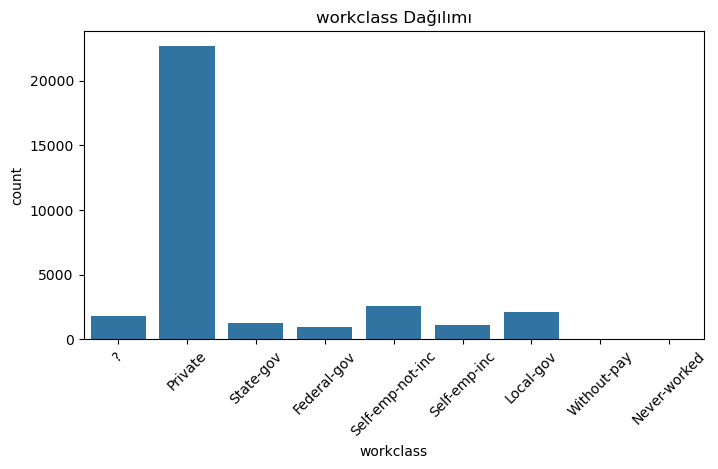

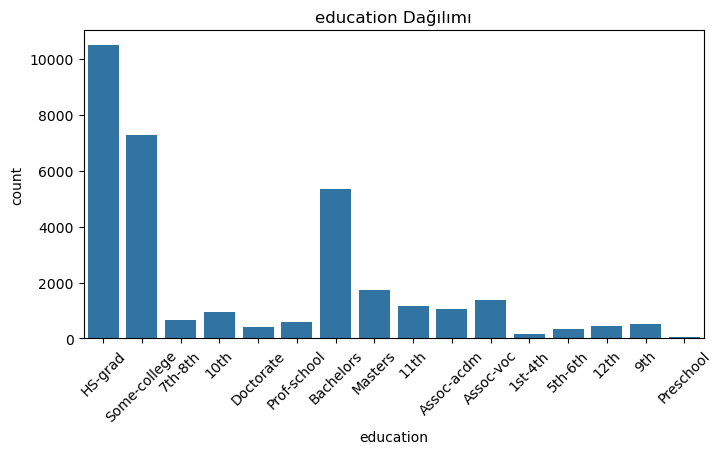

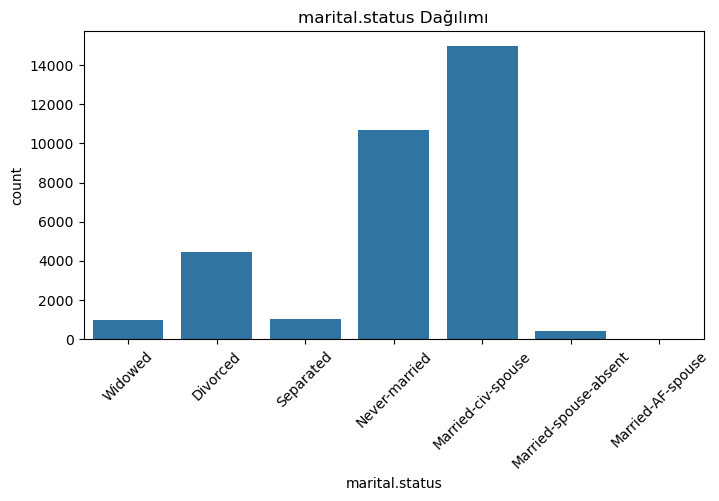

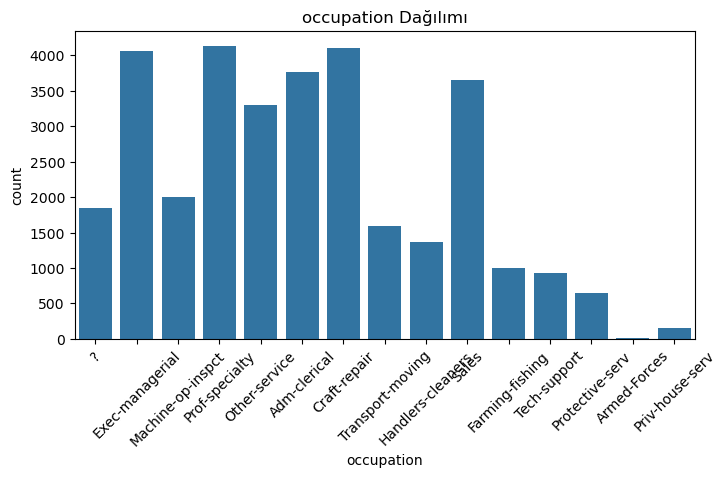

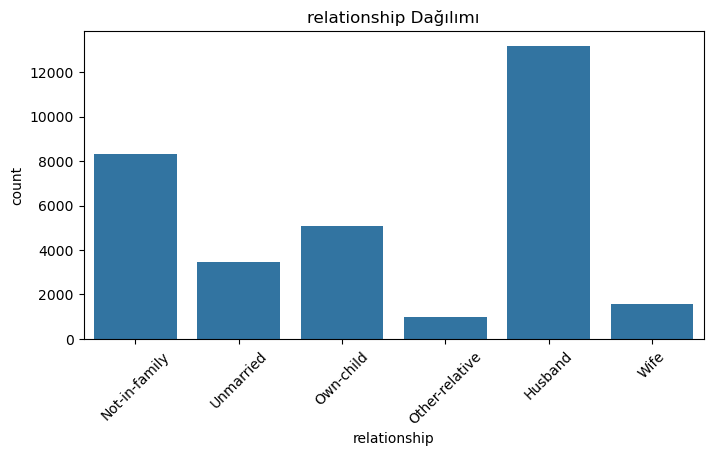

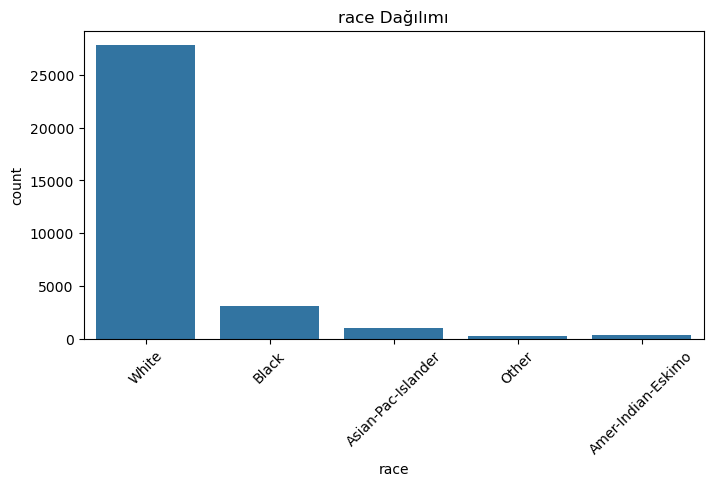

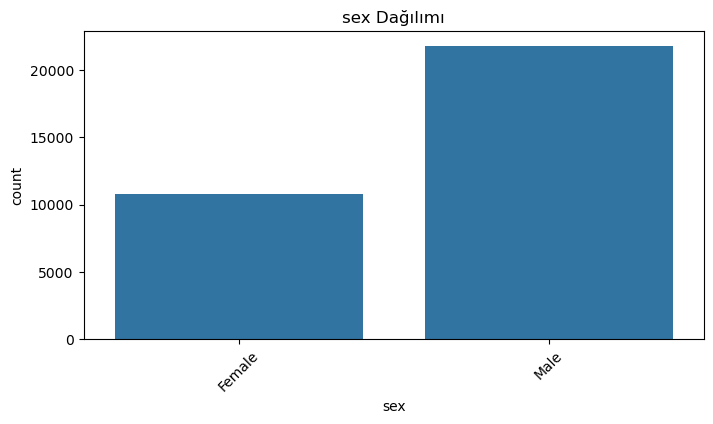

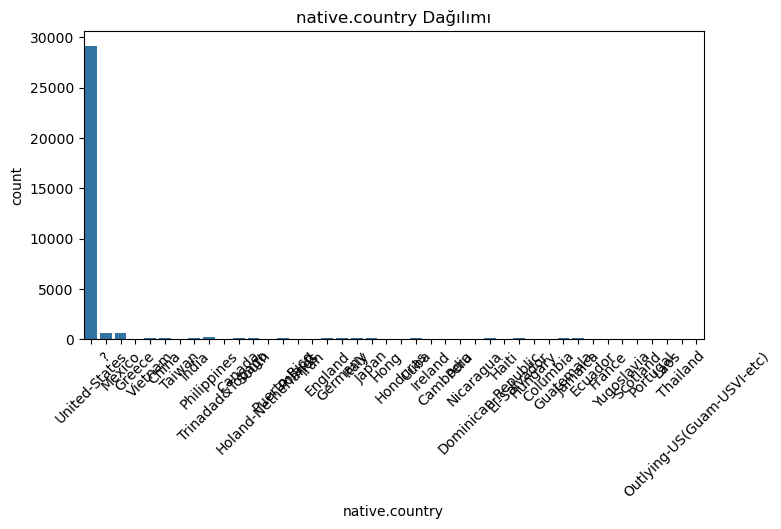

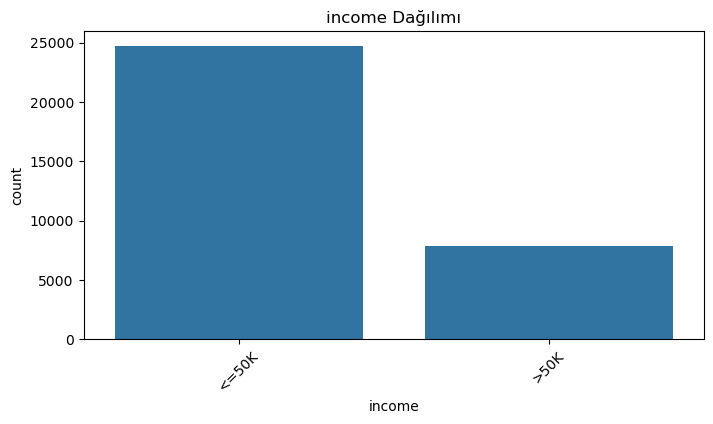

In [9]:
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=data, x=col)
    plt.title(f"{col} Dağılımı")
    plt.xticks(rotation=45)
    plt.show()

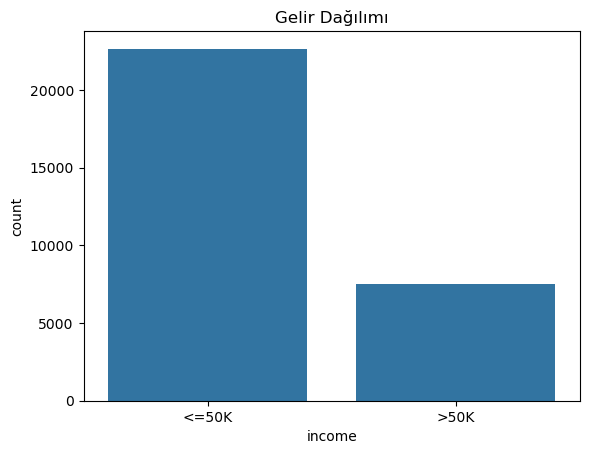

In [11]:
sns.countplot(x='income', data=data)
plt.title('Gelir Dağılımı')
plt.show()

In [11]:
# Label Encoding (Kategorik -> Sayısal)
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


# Özellik ve hedef değişkeni ayır
X = data.drop('income', axis=1)
y = data['income']

# Eğitim ve test verisi ayır
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ölçeklendirme (StandardScaler)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV


# KNN
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1: Manhattan, p=2: Euclidean
}

grid_knn = GridSearchCV(knn, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_knn.fit(X_train_scaled, y_train)
features = X_train.columns.to_list()
print("En iyi parametreler:", grid_knn.best_params_)

En iyi parametreler: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}


Accuracy: 0.8336
Precision: 0.7023
Recall: 0.5740
F1 Score: 0.6317


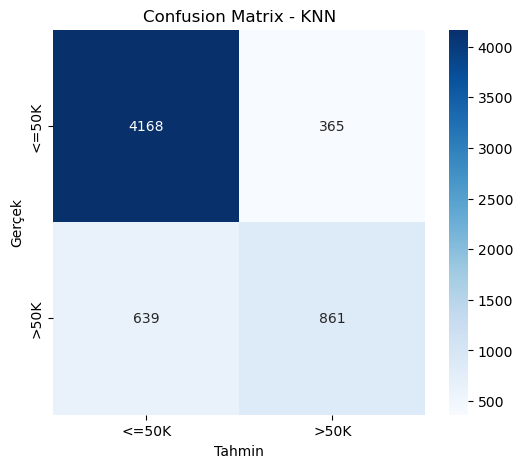


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89      4533
           1       0.70      0.57      0.63      1500

    accuracy                           0.83      6033
   macro avg       0.78      0.75      0.76      6033
weighted avg       0.83      0.83      0.83      6033



In [36]:
knn_best = grid_knn.best_estimator_
y_pred = knn_best.predict(X_test_scaled)

# Performans metrikleri
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# Confusion matrix görselleştirme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix - KNN')
plt.show()

# Daha detaylı rapor
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [17]:
import joblib

In [23]:
joblib.dump(grid_knn.best_estimator_, "model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoders, "encoders.pkl")

['encoders.pkl']